## Instructions:
- Install Plotly using 'pip install plotly' on your anaconda prompt

The following files should be in the same directory as that of this python notebook:
* gun-violence-data_01-2013_03-2018.csv
* StateWise.csv
* Gundata_2.csv
* 2017_parsed.csv

Datasets can be downloaded from the following link

https://purdue0-my.sharepoint.com/:u:/g/personal/kurians_purdue_edu/EaB10A_bahJHncUMqaHYOxEBF3zhwFN3C6oX0cNcdttEGg?e=wQKEIg

In [1]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy as cp
import re
import profile
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as py
from plotly import tools
init_notebook_mode(connected=True)
#offline.init_notebook_mode()
import plotly.graph_objs as go
import folium
from folium import plugins
from folium.plugins import HeatMap
from scipy import stats
import statsmodels.api as sm



In [2]:
#Reading only 10 rows to get the structure of data
gunData=pd.read_csv('gun-violence-data_01-2013_03-2018.csv',nrows=10)
gunData.head(2)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0


In [3]:
gunData.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

In [4]:
dropcols=["incident_characteristics",
              "incident_url",
              "sources",
              "source_url",
              "incident_url_fields_missing",
              "location_description",
              "participant_relationship",
              "notes",
    ]
reqCols=list(set(gunData.columns)-set(dropcols))
#read only the required columns all rows
%time gunData=pd.read_csv('gun-violence-data_01-2013_03-2018.csv',usecols=reqCols)

CPU times: user 2.26 s, sys: 232 ms, total: 2.49 s
Wall time: 2.69 s


In [5]:
gunData.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,...,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_name,participant_status,participant_type,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,NaN,NaN,...,-79.8559,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,NaN,NaN,...,-118.3330,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,...,-82.1377,2.0,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,NaN,NaN,...,-104.8020,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,...,-79.9569,2.0,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0


In [6]:
# Create some additional features
gunData['date'] = pd.to_datetime(gunData['date'])
gunData['year'] = gunData['date'].dt.year
gunData['month'] = gunData['date'].dt.month
gunData['monthday'] = gunData['date'].dt.day
gunData['weekday'] = gunData['date'].dt.weekday
gunData['victimCount'] = gunData['n_killed'] + gunData['n_injured']

In [7]:
#Looking for missing data
gunData.isnull().values.any()
gunData.isnull().sum()
gunData.isna().values.any()

missingdata_sum=gunData.isna().sum()
missingdata_count=gunData.isna().count()
percentage_missingdata=(missingdata_sum/missingdata_count) * 100
%time missingdata = pd.concat([missingdata_sum, percentage_missingdata], axis=1)
missingdata

CPU times: user 1.35 ms, sys: 42 µs, total: 1.4 ms
Wall time: 1.43 ms


,0,1
incident_id,0,0.000000
date,0,0.000000
state,0,0.000000
city_or_county,0,0.000000
address,16497,6.883013
n_killed,0,0.000000
n_injured,0,0.000000
congressional_district,11944,4.983373
gun_stolen,99498,41.513370
gun_type,99451,41.493760


## Cleaning the Dataset

In [8]:
# Cleaning and adding participant information
gunData["participant_gender"] = gunData["participant_gender"].fillna("0::Unknown")

def clean_participant_gender(row) :
    gender_row_values = []
    gender_row = str(row).split("||")
    for x in gender_row :
        gender_row_value = str(x).split("::")
        if len(gender_row_value) > 1 :
            gender_row_values.append(gender_row_value[1])
            
    return gender_row_values


%time participant_genders = gunData.participant_gender.apply(clean_participant_gender)
gunData["participant_gender_total"] = participant_genders.apply(lambda x: len(x))
gunData["participant_gender_male"] = participant_genders.apply(lambda x: x.count("Male"))
gunData["participant_gender_female"] = participant_genders.apply(lambda x: x.count("Female"))
gunData["participant_gender_unknown"] = participant_genders.apply(lambda x: x.count("Unknown"))
del(participant_genders)

CPU times: user 589 ms, sys: 21 ms, total: 610 ms
Wall time: 618 ms


In [9]:

#Cleaning the guns involved data 
gunData["n_guns_involved"] = gunData["n_guns_involved"].fillna(0)
gunData["gun_stolen"] = gunData["gun_stolen"].fillna("0::Unknown")


def clean_gun_stolen(row) :
    unknown = 0
    stolen = 0
    notstolen = 0
    row_values = []
    
    stolen_row = str(row).split("||")
    for x in stolen_row :
            row_value = str(x).split("::")
            if len(row_value) > 1 :
                row_values.append(row_value[1])
                if "Stolen" in row_value :
                    stolen = stolen+1
                elif "Not-stolen" in row_value :
                    notstolen = notstolen + 1
                else :
                    unknown = unknown + 1
                    
    return row_values


values = gunData.gun_stolen.apply(clean_gun_stolen)
gunData["gun_stolen"] = values.apply(lambda x: x.count("Stolen"))
gunData["gun_stolen_notstolen"] = values.apply(lambda x: x.count("Not-stolen"))
del(values)

In [10]:
gunData['gun_type']=gunData["gun_type"].fillna("0::Unknown")

In [11]:
#Parsing and listing the type of gun used (It is found out that 184 loops give us all the possible types of guns used)
n=0
k=[]
for i in gunData.gun_type:
    if (i!='0::Unknown') and  (n<184):
        for j in str(i).split('||'):
            if (str(j).split('::')[1]!='Unknown'):
                k.append(str(j).split('::')[1])
        n=n+1
    else:
        continue
#Type of Gun used
gunNames=list(set(k))
p=dict((gun,0) for gun in k)

for i in gunData.gun_type:
    for j in gunNames:
        if j in i:
            p[j]=p[j]+1
gunType=pd.DataFrame()
gunType['Gun Name']=list(p.keys())
gunType['Count']=list(p.values())

In [12]:
#It is found that after 7000 rows, the way in which data is stores is different, so we use regula expressions to change the data uniformly.
#Function 'sub' substitutes all incidences of '::' to ':' which will help us clean the text data further
def sub(row):
    if (type(row)==str):
        return (re.sub('::',':',row))
    else:
        return row
#Mappingthe 'sub' funciton on the participant_age_group column
gunData.participant_age_group=gunData.participant_age_group.map(sub)
gunData.participant_type=gunData.participant_type.map(sub)


In [13]:
# Data in the participant_type and participant_age_group is stored in a peculiar manner
# a sample data point in the 'participant_type' column is: 0:Victim||1:Subject-Suspect||2:Victim
#a sample data point in the 'participant_age_group' column is: 0:Adult 18+||1:Teen 12-17||2:Adult 18+
#here, 0,1 and 2 are the primary keys, and the data implies that there is one suspect who is a teen and two adult victims
# The followig function getIncidentData parses these two columns and returns a dictionary with all the valuable data results

def getIncidentData(row):
    #Making an initial output dictionary
    result={'suspect':0,'victims':0,'suspect_child':0,'suspect_teen':0,'suspect_adult':0,'victim_child':0,'victim_teen':0,'victim_adult':0}
    #Error handling if we encounter any NA values
    if (type(row.participant_type)==str) & (type(row.participant_age_group)==str):
        Ptype=[]
        ageGroup=[]
        for i in str(row['participant_type']).split('||'):
            Ptype.append(i.split(':')[1])
        
        for i in str(row['participant_age_group']).split('||'):
            ageGroup.append(i.split(':')[1])
        rowTable=pd.DataFrame()
        #PType refers to type of participant. Its either suspect or Victim
        #Age group refers to the age groups of the participants
        if(len(Ptype)==len(ageGroup)):
            rowTable['Type']=Ptype
            rowTable['AgeGroup']=ageGroup
            contingencyTable=rowTable.groupby(['Type','AgeGroup']).size().reset_index()
            result['suspect']=sum(rowTable.Type=='Subject-Suspect')
            result['victims']=sum(rowTable.Type=='Victim')
            #Making output dictionary
            if len(contingencyTable[(contingencyTable.AgeGroup=='Adult 18+') & (contingencyTable.Type=='Victim')])>0:
                result['victim_adult']=int(contingencyTable[(contingencyTable.AgeGroup=='Adult 18+') & (contingencyTable.Type=='Victim')][0])
            else:
                result['victim_adult']=0
            if len(contingencyTable[(contingencyTable.AgeGroup=='Teen 12-17') & (contingencyTable.Type=='Victim')])>0:
                result['victim_teen']=int(contingencyTable[(contingencyTable.AgeGroup=='Teen 12-17') & (contingencyTable.Type=='Victim')][0])
            else:
                result['victim_teen']=0
            if len(contingencyTable[(contingencyTable.AgeGroup=='Child 0-11') & (contingencyTable.Type=='Victim')])>0:
                result['victim_child']=int(contingencyTable[(contingencyTable.AgeGroup=='Child 0-11') & (contingencyTable.Type=='Victim')][0])
            else:
                result['victim_adult']=0
            if len(contingencyTable[(contingencyTable.AgeGroup=='Child 0-11') & (contingencyTable.Type=='Subject-Suspect')])>0:
                result['suspect_child']=int(contingencyTable[(contingencyTable.AgeGroup=='Child 0-11') & (contingencyTable.Type=='Subject-Suspect')][0])
            else:
                result['suspect_child']=0
                
            if len(contingencyTable[(contingencyTable.AgeGroup=='Adult 18+') & (contingencyTable.Type=='Subject-Suspect')])>0:
                result['suspect_adult']=int(contingencyTable[(contingencyTable.AgeGroup=='Adult 18+') & (contingencyTable.Type=='Subject-Suspect')][0])
            else:
                result['suspect_adult']=0
            if len(contingencyTable[(contingencyTable.AgeGroup=='Teen 12-17') & (contingencyTable.Type=='Subject-Suspect')])>0:
                result['suspect_teen']=int(contingencyTable[(contingencyTable.AgeGroup=='Teen 12-17') & (contingencyTable.Type=='Subject-Suspect')][0])
            else:
                result['suspect_teen']=0
        
                
       
    #Error handling    
    else:
        result={'suspect':0,'victims':0,'suspect_child':0,'suspect_teen':0,'suspect_adult':0,'victim_child':0,'victim_teen':0,'victim_adult':0}
    return result

In [14]:
#Getting 2017 data
p=cp.copy(gunData[gunData.year==2017])
p=p.reset_index(drop=True)

In [15]:
'''The following code takes 11 seconds for running 1000 rows of data hence commenting out the code.
The code is run and saved to a csv locally which will be read again in the next few code blocks to save time
'''

'The following code takes 11 seconds for running 1000 rows of data hence commenting out the code.\nThe code is run and saved to a csv locally which will be read again in the next few code blocks to save time\n'

In [16]:
'''
#The function below parses all the 67k rows for 2017 gun violence to check the type of victims, suspects and their age groups.
data=p.apply(getIncidentData,axis=1)
suspect=[]
victims=[]
suspect_child=[]
suspect_teen=[]
suspect_adult=[]
victim_child=[]
victim_teen=[]
victim_adult=[]
for i in range(0,len(p)):
    suspect.append((data[i]['suspect']))
    victims.append((data[i]['victims']))
    suspect_child.append((data[i]['suspect_child']))
    suspect_teen.append((data[i]['suspect_teen']))
    suspect_adult.append((data[i]['suspect_adult']))
    victim_child.append((data[i]['victim_child']))
    victim_teen.append((data[i]['victim_teen']))
    victim_adult.append((data[i]['victim_adult']))
'''
   

"\n#The function below parses all the 67k rows for 2017 gun violence to check the type of victims, suspects and their age groups.\ndata=p.apply(getIncidentData,axis=1)\nsuspect=[]\nvictims=[]\nsuspect_child=[]\nsuspect_teen=[]\nsuspect_adult=[]\nvictim_child=[]\nvictim_teen=[]\nvictim_adult=[]\nfor i in range(0,len(p)):\n    suspect.append((data[i]['suspect']))\n    victims.append((data[i]['victims']))\n    suspect_child.append((data[i]['suspect_child']))\n    suspect_teen.append((data[i]['suspect_teen']))\n    suspect_adult.append((data[i]['suspect_adult']))\n    victim_child.append((data[i]['victim_child']))\n    victim_teen.append((data[i]['victim_teen']))\n    victim_adult.append((data[i]['victim_adult']))\n"

In [17]:
'''
#Adding columns to dataframe
p['suspect']=suspect
p['victims']=victims
p['suspect_child']=suspect_child
p['suspect_teen']=suspect_teen
p['suspect_adult']=suspect_adult
p['victim_child']=victim_child
p['victim_teen']=victim_teen
p['victim_adult']=victim_adult
#Saving dataframe as csv
p.to_csv('2017_parsed.csv')
'''
    

"\n#Adding columns to dataframe\np['suspect']=suspect\np['victims']=victims\np['suspect_child']=suspect_child\np['suspect_teen']=suspect_teen\np['suspect_adult']=suspect_adult\np['victim_child']=victim_child\np['victim_teen']=victim_teen\np['victim_adult']=victim_adult\n#Saving dataframe as csv\np.to_csv('2017_parsed.csv')\n"

In [15]:
#Reading the gun Data for 2017
gunData_2017=pd.read_csv('2017_parsed.csv')
del gunData_2017['Unnamed: 0']

## Data exploration 
      
 - In this section we will focus on preparing charts and graphics to help derive informative insights

In [18]:
Year_analysis=gunData.groupby('year').count()['incident_id'].reset_index()
Year_analysis=Year_analysis[1:5]
Year_analysis.columns=['Year','Number of incidents']

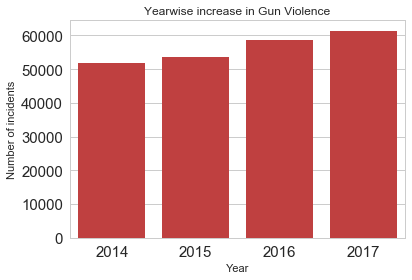

In [19]:
plt.figure(figsize=[6,4])
sns.set(style="whitegrid")
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Yearwise increase in Gun Violence')
ax = sns.barplot(x="Year", y="Number of incidents",data=Year_analysis, color="red", saturation=.5)


## INSIGHT: 
### From the above bar graph, its evident that over the years the gun violence incidents are increasing

In [20]:
gunType

,Gun Name,Count
0,Handgun,17619
1,22 LR,3104
2,223 Rem [AR-15],1248
3,Shotgun,3568
4,9mm,6053
5,45 Auto,2242
6,12 gauge,979
7,7.62 [AK-47],855
8,40 SW,2628
9,44 Mag,193


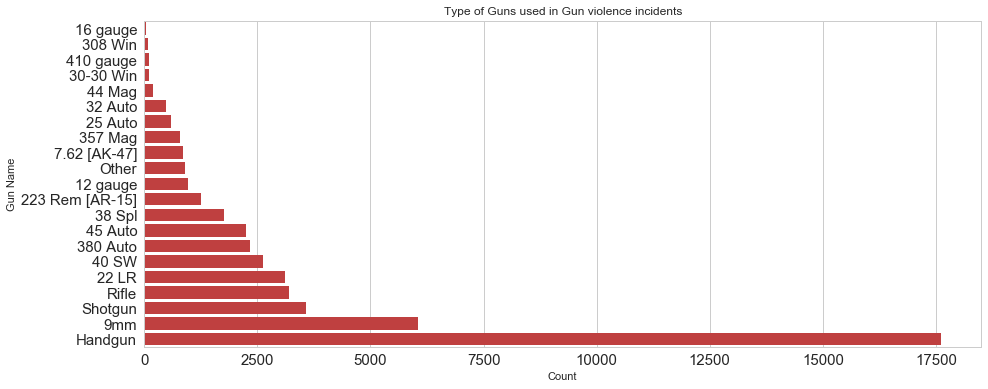

In [21]:
gunType= gunType.sort_values('Count')
plt.figure(figsize=[15,6])
sns.set(style="whitegrid")
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Type of Guns used in Gun violence incidents')
ax = sns.barplot(x="Count", y="Gun Name",data=gunType, color="red", saturation=.5)


## INSIGHT:
### Handguns are the most frequently used weapons in all the gun related incidents in the US

In [23]:
#Safe States and Violent states
stateData=pd.read_csv('StateWise.csv')
gunData.groupby('state')
stateData=stateData[['State','Population']]

In [24]:
StateIncidents=gunData.groupby('state').count()['incident_id'].reset_index()
stateData.columns=['state','population']
StateIncidents=StateIncidents.merge(stateData,left_on='state',right_on='state',how='inner')



In [25]:
StateIncidents['Incident per 100000']=StateIncidents['incident_id']*100000/StateIncidents['population']

In [26]:
StateIncidents=StateIncidents.sort_values(['Incident per 100000']).reset_index()
StateIncidents=StateIncidents.drop(columns=['index'])

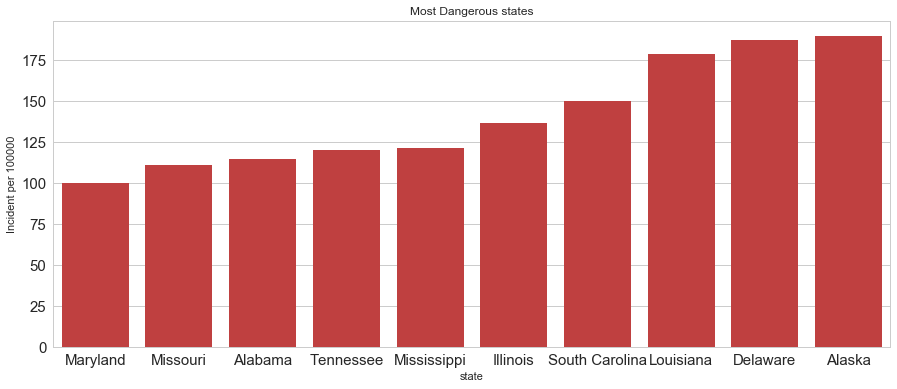

In [27]:
#Subsetting 10 worst states
WorstStates=StateIncidents[40:50]
gunType= gunType.sort_values('Count')
plt.figure(figsize=[15,6])
sns.set(style="whitegrid")
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Most Dangerous states')
ax = sns.barplot(x="state", y="Incident per 100000",data=WorstStates, color="red", saturation=.5)

## INSIGHT:
### Alaska is the most vulnerable state in terms of gun violence incidents followed by Delaware and Louisiana

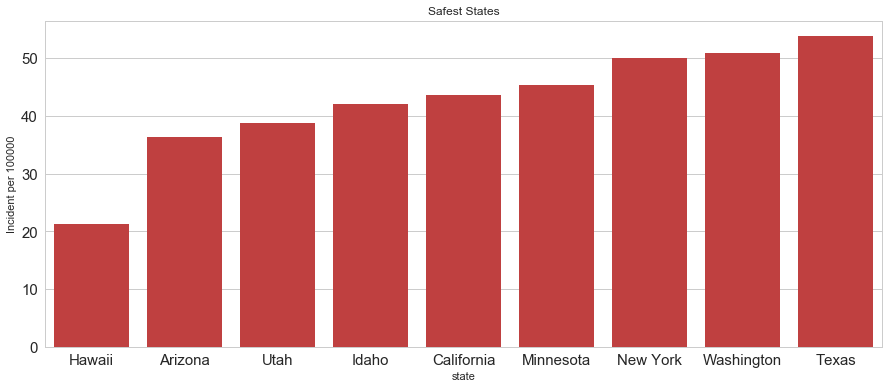

In [28]:
#Subsetting 10 best states
BestStates=StateIncidents[0:9]
gunType= gunType.sort_values('Count')
plt.figure(figsize=[15,6])
sns.set(style="whitegrid")
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Safest States')
ax = sns.barplot(x="state", y="Incident per 100000",data=BestStates, color="red", saturation=.5)

## INSIGHT:
### Hawaii is the safest state in terms of Gun violence followed by Arizona and Utah

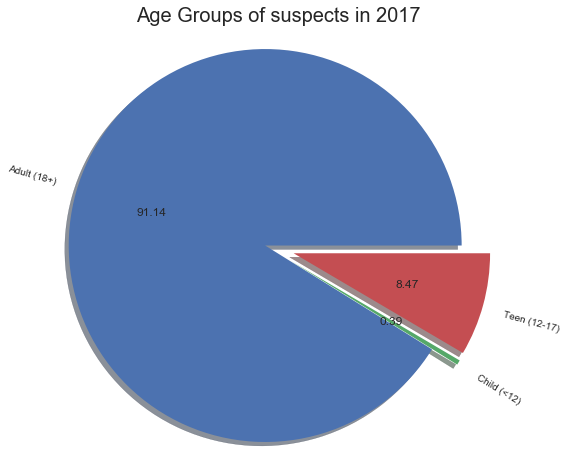

In [29]:
#Suspect age analysis
a=[0,0.15,0.15]
d = {'Type': ['Adult (18+)', 'Child (<12)','Teen (12-17)'], 'Values': [gunData_2017.suspect_adult.sum(),gunData_2017.suspect_child.sum(),gunData_2017.suspect_teen.sum()]}
Suspect_Age = pd.DataFrame(data=d)
Suspect_Age['Percentage']=round((Suspect_Age['Values']/sum(Suspect_Age['Values']))*100,2)
plt.figure(figsize=[8,8])
plt.title('Age Groups of suspects in 2017',fontsize=20)
plt.pie(Suspect_Age['Percentage'], labels=Suspect_Age['Type'],explode=a,autopct='%1.2f', shadow=True,rotatelabels=True)
plt.axis('equal') #so that it is a circle 
plt.show()

## INSIGHT:
### Even though most of the suspects in terms of gun violence are adults, a whopping 9% of the suspects are teenagers and children which is a disturbing number

In [30]:

state_codes = {                               # assigning state codes to state names
    'Alabama' : 'AL',
    'Alaska' : 'AK',
    'Arizona' : 'AZ',
    'Arkansas' : 'AR',
    'California' : 'CA',
    'Colorado' : 'CO',
    'Connecticut' : 'CT',
    'Delaware' : 'DE',
    'District of Columbia' : 'DC',
    'Florida' : 'FL',
    'Georgia' : 'GA',
    'Hawaii' : 'HI',
    'Idaho' : 'ID',
    'Illinois' : 'IL',
    'Indiana' : 'IN',
    'Iowa' : 'IA',
    'Kansas' : 'KS',
    'Kentucky' : 'KY',
    'Louisiana' : 'LA',
    'Maine' : 'ME',
    'Maryland' : 'MD',
    'Massachusetts' : 'MA',
    'Michigan' : 'MI',
    'Minnesota' : 'MN',
    'Mississippi' : 'MS',
    'Missouri' : 'MO',
    'Montana' : 'MT',
    'Nebraska' : 'NE',
    'Nevada' : 'NV',
    'New Hampshire' : 'NH',
    'New Jersey' : 'NJ',
    'New Mexico' : 'NM',
    'New York' : 'NY',
    'North Carolina' : 'NC',
    'North Dakota' : 'ND',
    'Ohio' : 'OH',
    'Oklahoma' : 'OK',
    'Oregon' : 'OR',
    'Pennsylvania' : 'PA',
    'Puerto Rico' : 'PR',
    'Rhode Island' : 'RI',
    'South Carolina' : 'SC',
    'South Dakota' : 'SD',
    'Tennessee' : 'TN',
    'Texas' : 'TX',
    'Utah' : 'UT',
    'Vermont' : 'VT',
    'Virginia' : 'VA',
    'Washington' : 'WA',
    'West Virginia' : 'WV',
    'Wisconsin' : 'WI',
    'Wyoming' : 'WY'
}


incidentCount = gunData_2017[['state', 'n_killed', 
                      'victim_child', 'victim_teen', 'victim_adult']]                   
    
incidentCount_byState = incidentCount.groupby('state').sum().reset_index()     # to capture information for different states, data is being organized by States

incidentCount_byState['state_codes'] = incidentCount_byState['state'].apply(lambda x : state_codes[x])
incidentCount_byState.sort_values(by='victim_child', ascending=False, inplace=True)

incidentCount_byState.reset_index()

incidentCount_byState_Child=incidentCount_byState[0:10]                        # storing the 10 most dangerous states for children in new dataframe


In [31]:
## Chart 1 ##
## Plotting bar graph for 10 most dangerous states for children ##

trace0 = go.Bar(
    x=incidentCount_byState_Child['state'],
    y=incidentCount_byState_Child['victim_child'],
    text=incidentCount_byState_Child['state'],
    marker=dict(
        color='rgb(216,71,39)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Child victims of gun violence',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

## Insight:
- From the chart above it can be inferred that Texas, California, Florida are the most unsafe states for children 

In [32]:
## Plotting a map of the US with states shaded on the basis of deaths from gun violence
## Chart 2 ##

data = [ dict(
        type='choropleth',
        autocolorscale = True,
        locations = incidentCount_byState['state_codes'],
        z = incidentCount_byState['n_killed'],
        locationmode = 'USA-states',
        text = incidentCount_byState['state'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Deaths")
        ) ]

layout = dict(
        title = 'Deaths from gun incidents (2017)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
        )
    
figure = dict(data=data, layout=layout)
py.iplot(figure)

## Insight:
- California, Texas, Florida and Illinois have witnessed the most number of deaths due to gun violence

In [33]:
def convertToFloat(x):
    try:
        x = float(x)
    except Exception:
        x = None
    return x

gunData_2017["longitude"] = gunData_2017["longitude"].apply(convertToFloat)
gunData_2017["latitude"] = gunData_2017["latitude"].apply(convertToFloat)

In [34]:
smalldf = gunData_2017[gunData_2017['victimCount'] >= 3][['latitude', 'longitude', 'victimCount']].dropna()
map1 = folium.Map(location=[40, -100], tiles='openstreetmap', zoom_start=3.5)
#CartoDB dark_matter
#openstreetmap
#cartodppositron


map2 = folium.Map([39.50, -98.35], zoom_start=3.5, tiles='cartodbdark_matter')

for i, row in smalldf.iterrows():
    loss = row['victimCount']
    
    folium.CircleMarker([float(row['latitude']), float(row['longitude'])], radius=float(loss), 
                        color='#ef4f4f', fill=True).add_to(map1)

map1

## Insight:
- The bubble plot superimposed on an interactive US map denotes the geographical locations of all gun violence incidents in 2017
- Users have the option of zooming in to view the exact location of where incidents took place

In [36]:
## An alternative visualization of Chart 3 has been presented in the heat map below ##


heat_df = gunData_2017[gunData_2017['victimCount'] >= 3][['latitude', 'longitude']].dropna()
map2 = folium.Map(location=[40,-100], tiles='openstreetmap', zoom_start=3.5)

heat_data = [[row['latitude'],row['longitude']] for index, row in heat_df.iterrows()]

HeatMap(heat_data).add_to(map2)

map2.save("heatmap_map2.html")

map2


## Insight: 
- This heat map highlights locations in the US based on the frequency of gun violence 

# Regression

# Transforming the dataset into a dataframe and slicing according to the variables we need for the Dependent Variable (Y)

In [37]:
parsed_2017_incidents = pd.DataFrame(gunData_2017.groupby('state')['incident_id'].count())
parsed_2017_incidents.sort_values(by = ['incident_id'], ascending=False)
parsed_2017_incidents['state'] = parsed_2017_incidents.index
parsed_2017_incidents.columns = ['incidents', 'State']
parsed_2017_incidents = parsed_2017_incidents.reset_index(drop=True)
incidents = parsed_2017_incidents.iloc[:, [1,0]]
incidents.head() # Dataframe consists of State-wise number of incidents, which will be our dependent variable (Y)

,State,incidents
0,Alabama,1461
1,Alaska,317
2,Arizona,587
3,Arkansas,820
4,California,4588


# Reading the independent variables data we accumulated from various web sources and converting the dataset into a dataframe

In [37]:
attributes = pd.read_csv("Gundata_2.csv")
attributes.head()
attributes = pd.DataFrame(attributes)
attributes.head()
# attributes.isnull()

,State,Population,Gun_Laws,Total_annual_crimes,Violent_Crime_rate_,Population_in_10000,No._of_registered_guns,Gun_ownership_in_10000,Populuation_Density(Population/land_area),land_area,Drug_score,unemployment_rate(%),income_per_capita,Percent_of_serious_mental_illness(%),high school drop out rate
0,Alabama,4777326,10,22952,48.04,477.73,161641,338.35,94.4,50607.27,34.59,3.7,23606,4.21,1.4
1,Alaska,711139,3,5392,75.82,71.11,15824,222.52,1.2,592615.83,47.72,7.0,33062,4.18,7.0
2,Arizona,6410979,8,28012,43.69,641.10,179738,280.36,56.3,113871.74,41.79,3.9,25715,4.25,5.9
3,Arkansas,2916372,11,15526,53.24,291.64,79841,273.77,56.0,52078.07,46.77,3.5,22883,5.20,3.2
4,California,37325068,107,166883,44.71,3732.51,344622,92.33,239.1,156106.52,38.08,3.7,30441,3.79,4.0


# Merging the 2 dataframes of independent (X) variables and dependent (Y) variable on State

In [38]:
attributes_parsed = pd.merge(attributes, incidents, on = 'State')
attributes_parsed.head()

,State,Population,Gun_Laws,Total_annual_crimes,Violent_Crime_rate_,Population_in_10000,No._of_registered_guns,Gun_ownership_in_10000,Populuation_Density(Population/land_area),land_area,Drug_score,unemployment_rate(%),income_per_capita,Percent_of_serious_mental_illness(%),high school drop out rate,incidents
0,Alabama,4777326,10,22952,48.04,477.73,161641,338.35,94.4,50607.27,34.59,3.7,23606,4.21,1.4,1461
1,Alaska,711139,3,5392,75.82,71.11,15824,222.52,1.2,592615.83,47.72,7.0,33062,4.18,7.0,317
2,Arizona,6410979,8,28012,43.69,641.10,179738,280.36,56.3,113871.74,41.79,3.9,25715,4.25,5.9,587
3,Arkansas,2916372,11,15526,53.24,291.64,79841,273.77,56.0,52078.07,46.77,3.5,22883,5.20,3.2,820
4,California,37325068,107,166883,44.71,3732.51,344622,92.33,239.1,156106.52,38.08,3.7,30441,3.79,4.0,4588


# Scaling the dependent variable (Y) by dividing it by the Population. 
# The final dependent variable (Y) is 'numberOfIncidents'

In [39]:
attributes_parsed['numberOfIncidents'] = attributes_parsed['incidents']/attributes_parsed['Population_in_10000']
attributes_parsed = attributes_parsed.drop('incidents', axis=1)
attributes_parsed.head()

,State,Population,Gun_Laws,Total_annual_crimes,Violent_Crime_rate_,Population_in_10000,No._of_registered_guns,Gun_ownership_in_10000,Populuation_Density(Population/land_area),land_area,Drug_score,unemployment_rate(%),income_per_capita,Percent_of_serious_mental_illness(%),high school drop out rate,numberOfIncidents
0,Alabama,4777326,10,22952,48.04,477.73,161641,338.35,94.4,50607.27,34.59,3.7,23606,4.21,1.4,3.058213
1,Alaska,711139,3,5392,75.82,71.11,15824,222.52,1.2,592615.83,47.72,7.0,33062,4.18,7.0,4.457882
2,Arizona,6410979,8,28012,43.69,641.10,179738,280.36,56.3,113871.74,41.79,3.9,25715,4.25,5.9,0.915614
3,Arkansas,2916372,11,15526,53.24,291.64,79841,273.77,56.0,52078.07,46.77,3.5,22883,5.20,3.2,2.811686
4,California,37325068,107,166883,44.71,3732.51,344622,92.33,239.1,156106.52,38.08,3.7,30441,3.79,4.0,1.229200


# Correlation Matrix with the correlation coefficients written along with the color coding

In [40]:
corr = round(attributes_parsed.corr(),2)
corr.style.background_gradient()

,Population,Gun_Laws,Total_annual_crimes,Violent_Crime_rate_,Population_in_10000,No._of_registered_guns,Gun_ownership_in_10000,Populuation_Density(Population/land_area),land_area,Drug_score,unemployment_rate(%),income_per_capita,Percent_of_serious_mental_illness(%),high school drop out rate,numberOfIncidents
Population,1,0.41,0.98,0.16,1,0.76,-0.19,-0.08,0.14,-0.1,0.04,0.02,-0.33,-0.04,-0.18
Gun_Laws,0.41,1,0.36,-0.09,0.41,0.05,-0.21,0.31,-0.22,0.05,0.02,0.64,-0.54,0.02,0.11
Total_annual_crimes,0.98,0.36,1,0.29,0.98,0.76,-0.17,-0.08,0.18,-0.07,0.06,-0.04,-0.32,0.01,-0.14
Violent_Crime_rate_,0.16,-0.09,0.29,1,0.16,0.16,-0.1,-0.21,0.48,0.12,0.34,-0.3,-0.17,0.38,0.03
Population_in_10000,1,0.41,0.98,0.16,1,0.76,-0.19,-0.08,0.14,-0.1,0.04,0.02,-0.33,-0.04,-0.18
No._of_registered_guns,0.76,0.05,0.76,0.16,0.76,1,0.1,-0.07,0.21,-0.09,0.05,-0.08,-0.24,-0.1,-0.12
Gun_ownership_in_10000,-0.19,-0.21,-0.17,-0.1,-0.19,0.1,1,0.15,0.07,0.18,0.11,0.07,0,0.13,0.15
Populuation_Density(Population/land_area),-0.08,0.31,-0.08,-0.21,-0.08,-0.07,0.15,1,-0.17,0.38,0.27,0.59,-0.21,0.22,0.89
land_area,0.14,-0.22,0.18,0.48,0.14,0.21,0.07,-0.17,1,-0.06,0.46,-0.05,-0.07,0.39,-0.03
Drug_score,-0.1,0.05,-0.07,0.12,-0.1,-0.09,0.18,0.38,-0.06,1,0.4,0.19,0.15,0.35,0.4


## INSIGHT -
### For the regression model to accurately predict the relationship between variables, there should be either no or very less correlation between the independent variables. If there is a high correlation between the independent variables, the issue of multicollinearity might arise which can skew the model results.
### From the above Correlation Matrix, we can see that there is a high correlation between the following variables, hence we need to drop all these columns which have high correlation between them -
 > Population
 
 > Total_annual_crimes

In [41]:
attributes_parsed = attributes_parsed.drop('Population', axis = 1)
attributes_parsed = attributes_parsed.drop('Total_annual_crimes', axis = 1)
corr = round(attributes_parsed.corr(),2)
corr.style.background_gradient()

,Gun_Laws,Violent_Crime_rate_,Population_in_10000,No._of_registered_guns,Gun_ownership_in_10000,Populuation_Density(Population/land_area),land_area,Drug_score,unemployment_rate(%),income_per_capita,Percent_of_serious_mental_illness(%),high school drop out rate,numberOfIncidents
Gun_Laws,1,-0.09,0.41,0.05,-0.21,0.31,-0.22,0.05,0.02,0.64,-0.54,0.02,0.11
Violent_Crime_rate_,-0.09,1,0.16,0.16,-0.1,-0.21,0.48,0.12,0.34,-0.3,-0.17,0.38,0.03
Population_in_10000,0.41,0.16,1,0.76,-0.19,-0.08,0.14,-0.1,0.04,0.02,-0.33,-0.04,-0.18
No._of_registered_guns,0.05,0.16,0.76,1,0.1,-0.07,0.21,-0.09,0.05,-0.08,-0.24,-0.1,-0.12
Gun_ownership_in_10000,-0.21,-0.1,-0.19,0.1,1,0.15,0.07,0.18,0.11,0.07,0,0.13,0.15
Populuation_Density(Population/land_area),0.31,-0.21,-0.08,-0.07,0.15,1,-0.17,0.38,0.27,0.59,-0.21,0.22,0.89
land_area,-0.22,0.48,0.14,0.21,0.07,-0.17,1,-0.06,0.46,-0.05,-0.07,0.39,-0.03
Drug_score,0.05,0.12,-0.1,-0.09,0.18,0.38,-0.06,1,0.4,0.19,0.15,0.35,0.4
unemployment_rate(%),0.02,0.34,0.04,0.05,0.11,0.27,0.46,0.4,1,0.06,0.03,0.47,0.41
income_per_capita,0.64,-0.3,0.02,-0.08,0.07,0.59,-0.05,0.19,0.06,1,-0.55,0.05,0.42


### From the above Correlation Matrix, we can see that there is a high correlation between the following variables, hence we need to drop all these columns which have high correlation between them -
 > Population_in_10000
 
 > No._of_registered_guns

In [42]:
attributes_parsed = attributes_parsed.drop('Population_in_10000', axis = 1)
attributes_parsed = attributes_parsed.drop('No._of_registered_guns', axis = 1)
corr = round(attributes_parsed.corr(),2)
corr.style.background_gradient()

,Gun_Laws,Violent_Crime_rate_,Gun_ownership_in_10000,Populuation_Density(Population/land_area),land_area,Drug_score,unemployment_rate(%),income_per_capita,Percent_of_serious_mental_illness(%),high school drop out rate,numberOfIncidents
Gun_Laws,1,-0.09,-0.21,0.31,-0.22,0.05,0.02,0.64,-0.54,0.02,0.11
Violent_Crime_rate_,-0.09,1,-0.1,-0.21,0.48,0.12,0.34,-0.3,-0.17,0.38,0.03
Gun_ownership_in_10000,-0.21,-0.1,1,0.15,0.07,0.18,0.11,0.07,0,0.13,0.15
Populuation_Density(Population/land_area),0.31,-0.21,0.15,1,-0.17,0.38,0.27,0.59,-0.21,0.22,0.89
land_area,-0.22,0.48,0.07,-0.17,1,-0.06,0.46,-0.05,-0.07,0.39,-0.03
Drug_score,0.05,0.12,0.18,0.38,-0.06,1,0.4,0.19,0.15,0.35,0.4
unemployment_rate(%),0.02,0.34,0.11,0.27,0.46,0.4,1,0.06,0.03,0.47,0.41
income_per_capita,0.64,-0.3,0.07,0.59,-0.05,0.19,0.06,1,-0.55,0.05,0.42
Percent_of_serious_mental_illness(%),-0.54,-0.17,0,-0.21,-0.07,0.15,0.03,-0.55,1,-0.11,-0.17
high school drop out rate,0.02,0.38,0.13,0.22,0.39,0.35,0.47,0.05,-0.11,1,0.26


### From the above Correlation Matrix, now there are only 2 independent variables who have relatively higher correlation coefficient, hence we need to remove one of them. The 2 variables are -

> Gun_Laws

> income_per_capita

### First, I will remove the variable of Gun_Laws and check how the model is performing. My choice of leaving out Gun_Laws is a little qualitative, we can see that Gun_Laws just suggest the number of gun laws and says nothing about the what is the law about, hence it is possible that we might have no significance of Gun_Laws in our model. 

### Whereas, income_per_capita is an important variable when considering the number of shooting incidents and it has a high correlation value as well with the number of shooting incidents. It MIGHT be possible that it turns out to be a good predictor of the Y variable.

In [43]:
attributes_parsed = attributes_parsed.drop('Gun_Laws', axis = 1)
corr = round(attributes_parsed.corr(),2)
corr.style.background_gradient()

,Violent_Crime_rate_,Gun_ownership_in_10000,Populuation_Density(Population/land_area),land_area,Drug_score,unemployment_rate(%),income_per_capita,Percent_of_serious_mental_illness(%),high school drop out rate,numberOfIncidents
Violent_Crime_rate_,1,-0.1,-0.21,0.48,0.12,0.34,-0.3,-0.17,0.38,0.03
Gun_ownership_in_10000,-0.1,1,0.15,0.07,0.18,0.11,0.07,0,0.13,0.15
Populuation_Density(Population/land_area),-0.21,0.15,1,-0.17,0.38,0.27,0.59,-0.21,0.22,0.89
land_area,0.48,0.07,-0.17,1,-0.06,0.46,-0.05,-0.07,0.39,-0.03
Drug_score,0.12,0.18,0.38,-0.06,1,0.4,0.19,0.15,0.35,0.4
unemployment_rate(%),0.34,0.11,0.27,0.46,0.4,1,0.06,0.03,0.47,0.41
income_per_capita,-0.3,0.07,0.59,-0.05,0.19,0.06,1,-0.55,0.05,0.42
Percent_of_serious_mental_illness(%),-0.17,0,-0.21,-0.07,0.15,0.03,-0.55,1,-0.11,-0.17
high school drop out rate,0.38,0.13,0.22,0.39,0.35,0.47,0.05,-0.11,1,0.26
numberOfIncidents,0.03,0.15,0.89,-0.03,0.4,0.41,0.42,-0.17,0.26,1


## INSIGHT -
### Now from the above correlation matrix, we can see that there is not a very high correlation coefficient amongst any of the independent variables. Every independent variable has a correlation coeeficient less than 0.60.
### Hence, we can incorporate all these variables in the model and then check the performance of the model. We will follow the hybrid approach of regression modeling, which incorporates both forward selection and backward elimination.

## Regression Model - 1 (with 9 independent variables)

In [44]:
from sklearn.linear_model import LinearRegression
y=attributes_parsed.iloc[:,-1].values
# print(y)

x=attributes_parsed.iloc[:,[1,2,3,4,5,6,7,8,9]].values
# x=x.reshape(-1, 1)
# print(x)

regressor = LinearRegression()
regressor.fit(x, y)

y_pred = regressor.predict(x)
y_pred

print("Regression Coefficient: %.3f" %regressor.score(x,y)) # R-square
print()
print("Coefficients of the equation - ")
print()
print(regressor.coef_)
print()
print("Regression Intercept: %.3f" %regressor.intercept_)

#############################################################################
X = attributes_parsed.iloc[:,[1,2,3,4,5,6,7,8,9]].values

y = attributes_parsed.iloc[:,-1].values
## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()

Regression Coefficient: 0.869

Coefficients of the equation - 

[ 2.81866139e-02  1.63839097e-04  1.59067587e-03  7.57139231e-07
  2.24928915e-03  2.60599947e-01 -5.64635315e-05 -3.50745747e-02
 -1.37093585e-01]

Regression Intercept: 1.876


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     30.10
Date:                Wed, 20 Feb 2019   Prob (F-statistic):           2.59e-15
Time:                        12:34:35   Log-Likelihood:                -60.507
No. Observations:                  51   AIC:                             141.0
Df Residuals:                      41   BIC:                             160.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8760      2.657      0.706      0.484      -3.491       7.242
x1             0.0282      0.013      2.153      0.037       0.002       0.055
x2             0.0002      0.000      0.407      0.686      -0.001       0.001
x3             0.0016      0.000     12.075      0.000       0.001       0.002
x4          7.571e-07   2.02e-06      0.375      0.710   -3.32e-06    4.84e-06
x5             0.0022      0.022      0.101      0.920      -0.043       0.047
x6             0.2606      0.192      1.355      0.183      -0.128       0.649
x7         -5.646e-05   4.65e-05     -1.214      0.232      -0.000    3.75e-05
x8            -0.0351      0.363     -0.097      0.923      -0.767       0.697
x9            -0.1371      0.111     -1.237      0.223      -0.361       0.087
==============================================================================
Omnibus:                        0.012   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.994   Jarque-Bera (JB):                0.154
Skew:                           0.026   Prob(JB):                        0.926
Kurtosis:                       2.736   Cond. No.                     2.43e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## INSIGHTS -
### After a lot of such iterations of adding and removing the variables, we finally came to a model where the Regression Coefficient was high and the p-values were also less.
### This model had 3 variables - 
> unemployment_rate

> population density

> income per capita
### Hence, we are going to run the final regression model using these 3 variables and predict the number of shooting incidents via the combination of these 3 independent factors

In [45]:
attributes_parsed_model2 = attributes_parsed.drop(['Violent_Crime_rate_','Drug_score','Gun_ownership_in_10000','land_area','Percent_of_serious_mental_illness(%)','high school drop out rate'], axis=1)


## Regression Model - 2 (with 3 independent variables)

In [46]:
from sklearn.linear_model import LinearRegression
y=attributes_parsed_model2.iloc[:,-1].values
# print(y)

x=attributes_parsed_model2.iloc[:,[1,2,3]].values
# x=x.reshape(-1, 1)
# print(x)

regressor = LinearRegression()
regressor.fit(x, y)

y_pred = regressor.predict(x)
y_pred

print("Regression Coefficient: %.3f" %regressor.score(x,y)) # R-square
print()
print("Coefficients of the equation - ")
print()
print(regressor.coef_)
print()
print("Regression Intercept: %.3f" %regressor.intercept_)

#############################################################################
X = attributes_parsed_model2.iloc[:,[1,2,3]].values

y = attributes_parsed_model2.iloc[:,-1].values
## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()

Regression Coefficient: 0.842

Coefficients of the equation - 

[ 1.50121902e-03  4.01569634e-01 -6.76242484e-05]

Regression Intercept: 2.358


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     83.26
Date:                Wed, 20 Feb 2019   Prob (F-statistic):           7.96e-19
Time:                        12:34:40   Log-Likelihood:                -65.256
No. Observations:                  51   AIC:                             138.5
Df Residuals:                      47   BIC:                             146.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3583      1.125      2.097      0.041       0.096       4.621
x1             0.0015      0.000     12.454      0.000       0.001       0.002
x2             0.4016      0.149      2.689      0.010       0.101       0.702
x3         -6.762e-05   3.32e-05     -2.040      0.047      -0.000   -9.21e-07
==============================================================================
Omnibus:                        1.315   Durbin-Watson:                   2.215
Prob(Omnibus):                  0.518   Jarque-Bera (JB):                1.321
Skew:                           0.348   Prob(JB):                        0.516
Kurtosis:                       2.630   Cond. No.                     2.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## INSIGHTS -
### The Regression Coefficient of this model is very high - 84.2%
### This model had 3 variables with very low p-values - 
> population density (0.000)

> unemployment_rate (0.010)

> income per capita (0.047)
### Hence, this is the final regression model and we get our final regression equation with 3 significant independent variables.

## Slowest part of the code  and its Scalability

In [47]:
#Will write a simple function to measure time. 
#The function takes three arguments: fun, arg1, and arg2. 
import time 

def measureTime(arg1):
    nTimes=1
    
    times=np.zeros(nTimes)
    for i in range(nTimes):
        p=cp.copy(gunData[gunData.year==2017])
        p=p.reset_index(drop=True)
        p=p[:arg1]
        startTime = time.time()    
        p.apply(getIncidentData,axis=1)
        endTime = time.time()
        times[i]=endTime-startTime
    return np.mean(times)

In [57]:
N = np.geomspace(start=30,stop=4000,num=15,dtype=int) # Number of rows to parse
times = np.zeros(len(N)) # create an array to store measured times in

for (i, n) in enumerate(N):
    t = measureTime(n)
    times[i] = t

In [58]:
#data=p.apply(getIncidentData,axis=1)
times

array([ 0.34180212,  0.38797688,  0.52846217,  1.19652128,  1.02343869,
        1.31110001,  1.98379087,  2.687289  ,  3.95059609,  6.16481495,
       10.48673105, 14.13585997, 20.26634717, 25.60318112, 41.20270085])

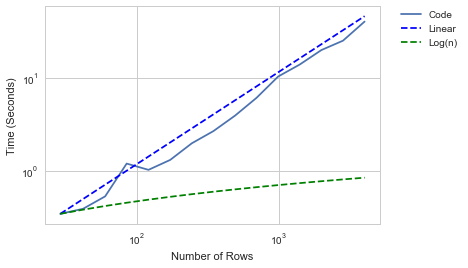

In [59]:
linearTime = [times[0]/N[0]*n for n in N]
lognTime = [times[0]/(np.log(N[0]))*(np.log(n)) for n in N]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.loglog (N, times, '-',label="Code")
ax1.loglog (N, linearTime, 'b--',label="Linear")
ax1.loglog (N, lognTime, 'g--',label="Log(n)")
plt.xlabel('Number of Rows')
plt.ylabel('Time (Seconds)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [60]:
'''
Finding average time for on line of code. As the execution time for the code goes linearly with the 
increase in the number of rows parsed, we can find out the average time it takes for parsing one row of data.
This average time can be used to check the scalability of the model for additional rows of data
'''
averageTime=[]
for (i,n) in enumerate(N):
    averageTime.append(times[i]/n)
print("It takes ",np.mean(averageTime),"seconds to parse one row of data\n")
print('For 2017, there are are',len(gunData_2017),' rows of data. In order to parse this data,\nit should take',len(gunData_2017)*np.mean(averageTime)/60,'Minutes to run')
print('\nWe have',len(gunData),'rows of data for the incidents that occured from January 2013 to March 2018.\nIn order to parse this data it would take', len(gunData)*np.mean(averageTime)/60,'minutes to parse this data')



It takes  0.009537848153209063 seconds to parse one row of data

For 2017, there are are 61401  rows of data. In order to parse this data,
it should take 9.760556907586496 Minutes to run

We have 239677 rows of data for the incidents that occured from January 2013 to March 2018.
In order to parse this data it would take 38.100047196944814 minutes to parse this data


In [61]:
p=cp.copy(gunData[gunData.year==2017])

## In order to scale this algorithm for the year 2017 to parse gun violence data for other countries, we will take countries like Iraq, Russia and Phillipines into account who have similar gun violence incidents per 100000 people. We assume the number of gun incidents per 100000 people to be constant for each of the country and then calculate the number of rows for each country according to their population in 2017

In [65]:
#Calculating the number of gun incidents per person in US
inc_per_person=(61401/325700000)
print(inc_per_person)

0.00018852011053116364


In [66]:
# We obtained the populations for the three countries, Russia, Iraq and Phillipines in 2017 and they are as follows
russia_population=144000000
iraq_population=39000000
phillipines_population=106500000
russia_incident=inc_per_person*russia_population
iraq_incident=inc_per_person*iraq_population
phillipines_incident=inc_per_person*phillipines_population
total_inc=int(round(phillipines_incident+iraq_incident+russia_incident+61401,0))
print('Total number of rows for all of the three countries in 2017 combined is:',int(round(phillipines_incident+iraq_incident+russia_incident,0)))
print('\nTotal rows of data for all the four countries combined are:',total_inc)
print('\nTo parse gun violence data for four countries for 2017, we would require',total_inc*np.mean(averageTime)/60,'Minutes to run')
print('\nTo parse gun violence data for four countries for five years, we would require',total_inc*np.mean(averageTime)/60*5,'Minutes to run')

Total number of rows for all of the three countries in 2017 combined is: 54577

Total rows of data for all the four countries combined are: 115978

To parse gun violence data for four countries for 2017, we would require 18.436342551881346 Minutes to run

To parse gun violence data for four countries for five years, we would require 92.18171275940674 Minutes to run


In [64]:
len(gunData)

239677

## Profiling the getIncidentData() function

In [56]:
p=cp.copy(gunData[gunData.year==2017])
p=p.reset_index(drop=True)
p=p[:10]
   

profile.run('p.apply(getIncidentData,axis=1)')

         125943 function calls (124464 primitive calls) in 0.515 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      120    0.000    0.000    0.000    0.000 :0(__getitem__)
      208    0.001    0.000    0.001    0.000 :0(__new__)
       18    0.000    0.000    0.000    0.000 :0(add)
       53    0.000    0.000    0.002    0.000 :0(all)
       46    0.000    0.000    0.000    0.000 :0(and_)
      323    0.001    0.000    0.006    0.000 :0(any)
      361    0.001    0.000    0.001    0.000 :0(append)
      183    0.001    0.000    0.001    0.000 :0(arange)
       42    0.000    0.000    0.000    0.000 :0(argsort)
1248/1196    0.005    0.000    0.007    0.000 :0(array)
       51    0.000    0.000    0.000    0.000 :0(astype)
       18    0.000    0.000    0.000    0.000 :0(bincount)
      238    0.000    0.000    0.000    0.000 :0(callable)
      180    0.000    0.000    0.000    0.000 :0(checknull)
       30    0.000    0.

        6    0.000    0.000    0.007    0.001 frame.py:7308(_arrays_to_mgr)
        6    0.000    0.000    0.004    0.001 frame.py:7326(extract_index)
        6    0.000    0.000    0.000    0.000 frame.py:7378(_prep_ndarray)
        6    0.000    0.000    0.000    0.000 frame.py:7603(_homogenize)
       54    0.000    0.000    0.001    0.000 frame.py:844(__len__)
       24    0.000    0.000    0.000    0.000 fromnumeric.py:1427(ravel)
        6    0.000    0.000    0.000    0.000 fromnumeric.py:2456(prod)
       12    0.000    0.000    0.000    0.000 fromnumeric.py:50(_wrapfunc)
       12    0.000    0.000    0.000    0.000 fromnumeric.py:851(argsort)
       24    0.000    0.000    0.000    0.000 frozen.py:101(_shallow_copy)
       24    0.000    0.000    0.001    0.000 frozen.py:145(_ensure_frozen)
      120    0.001    0.000    0.001    0.000 frozen.py:38(__getitem__)
        1    0.000    0.000    0.000    0.000 function.py:38(__call__)
       24    0.001    0.000    0.004    0.000

## From profiling this function, we find out that the (isinstance) function is called  28447  times which is the maximum number of funtion calls. It is an inbuilt python function which returns a Boolean stating whether the object is an instance or subclass of another object.